In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df_x = pd.read_csv('logisticX.csv', header=None, names=['Feature1', 'Feature2'])
df_y = pd.read_csv('logisticY.csv', header=None, names=['Label'])


def normalize_features(X, epsilon=1e-8):
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    normalized_X = (X - mean) / (std_dev + epsilon)
    return normalized_X

In [3]:

df_x.insert(0, 'Bias', 1)


X = df_x.values
y = df_y.values.flatten()

# Normalizing independent variables befores training.
X_normalized = normalize_features(X)


theta = np.zeros(X_normalized.shape[1])

In [4]:

learning_rate = 0.1
num_iterations = 1000


In [5]:
#Sigmoid Function
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip values to avoid overflow or underflow in the exponent
    return 1 / (1 + np.exp(-z))

#Cost Function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = -1/m * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
    return cost

#Decision boundary Function
def decision_boundary(X, theta):
    return -(theta[0] + theta[1]*X) / theta[2]

#Gradient descent Function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        h = sigmoid(X @ theta)
        gradient = 1/m * X.T @ (h - y)
        theta -= learning_rate * gradient

        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [6]:
theta, cost_history = gradient_descent(X_normalized, y, theta, learning_rate, num_iterations)

In [14]:
# Question 1
final_cost = round(final_cost, 2)
final_theta = np.round(final_theta, 2)

print(f"Final Cost Function Value: {final_cost}")
print(f"Final Parameters (theta): {final_theta}")


Final Cost Function Value: 0.23
Final Parameters (theta): [ 0.    2.31 -2.43]


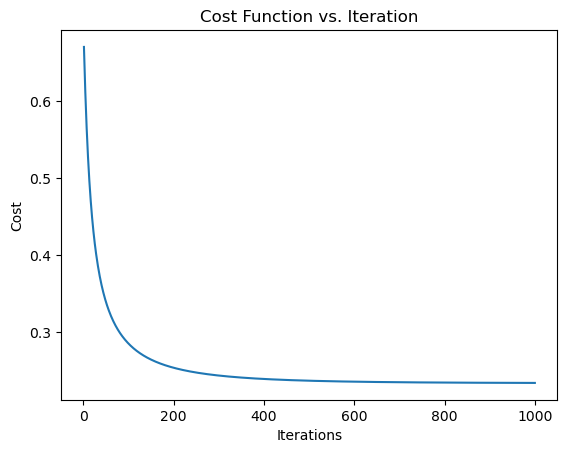

In [15]:
# Question 2
plt.plot(range(1, num_iterations + 1), cost_history)
plt.title('Cost Function vs. Iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

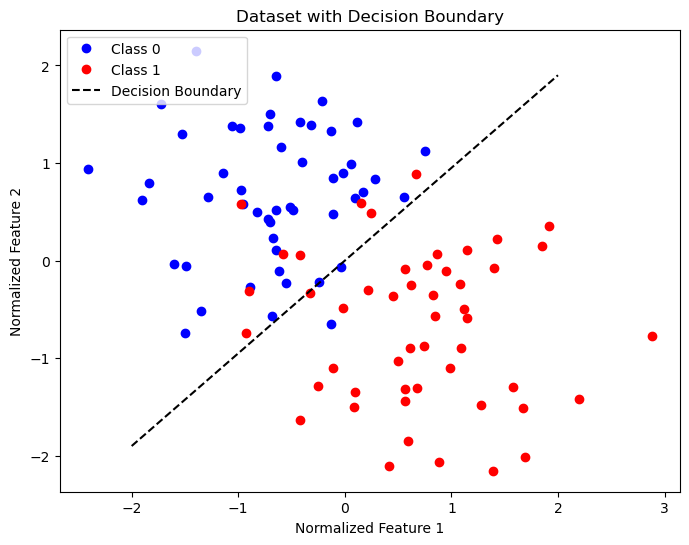

In [16]:
# Question 3

plt.figure(figsize=(8, 6))


plt.plot(X_normalized[y == 0, 1], X_normalized[y == 0, 2], 'bo', label='Class 0')


plt.plot(X_normalized[y == 1, 1], X_normalized[y == 1, 2], 'ro', label='Class 1')


boundary_x = np.linspace(-2, 2, 100)
boundary_y = decision_boundary(boundary_x, theta)
plt.plot(boundary_x, boundary_y, label='Decision Boundary', color='black', linestyle='--')


plt.title('Dataset with Decision Boundary')
plt.xlabel('Normalized Feature 1')
plt.ylabel('Normalized Feature 2')
plt.legend()


plt.show()

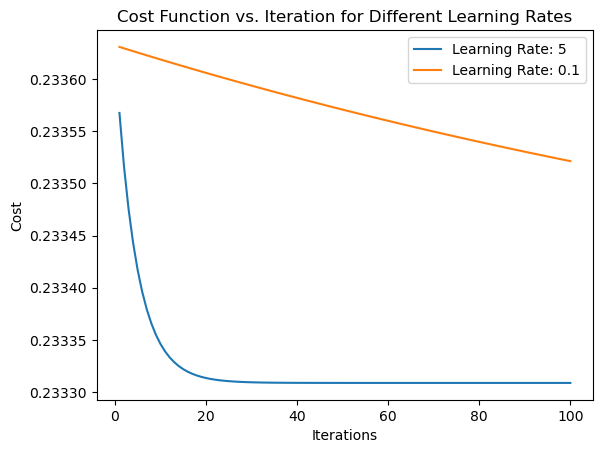

In [17]:
# Question 4

learning_rate_5 = 5
learning_rate_01 = 0.1
num_iterations = 100


theta_5, cost_history_5 = gradient_descent(X_normalized, y, theta.copy(), learning_rate_5, num_iterations)


theta_01, cost_history_01 = gradient_descent(X_normalized, y, theta.copy(), learning_rate_01, num_iterations)


plt.plot(range(1, num_iterations + 1), cost_history_5, label='Learning Rate: 5')
plt.plot(range(1, num_iterations + 1), cost_history_01, label='Learning Rate: 0.1')

plt.title('Cost Function vs. Iteration for Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [18]:
# Question 5

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, fp, tn, fn


def accuracy(tp, fp, tn, fn):
    total = tp + fp + tn + fn
    correct = tp + tn
    return correct / total


def precision(tp, fp):
    return tp / (tp + fp)


def recall(tp, fn):
    return tp / (tp + fn)


def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)


predictions = (sigmoid(X_normalized @ theta) >= 0.5).astype(int)


tp, fp, tn, fn = confusion_matrix(y, predictions)


acc = accuracy(tp, fp, tn, fn)
prec = precision(tp, fp)
rec = recall(tp, fn)
f1 = f1_score(prec, rec)


print("Confusion Matrix:")
print("True Positive:", tp)
print("False Positive:", fp)
print("True Negative:", tn)
print("False Negative:", fn)
print("\nMetrics (in percentage):")
print("Accuracy:", acc * 100)
print("Precision:", prec * 100)
print("Recall:", rec * 100)
print("F1-score:", f1 * 100)


Confusion Matrix:
True Positive: 42
False Positive: 2
True Negative: 48
False Negative: 8

Metrics (in percentage):
Accuracy: 90.0
Precision: 95.45454545454545
Recall: 84.0
F1-score: 89.36170212765958
